In [231]:
#Homework 1 
#Cemre Çelebi

#to import files

data2021 <- read.csv("/Users/cemrecelebi/Downloads/E02021.csv")
data1920 <- read.csv("/Users/cemrecelebi/Downloads/E01920.csv")
data1819 <- read.csv("/Users/cemrecelebi/Downloads/E01819.csv")

#to understand data
#str(data1819)
#str(data1920)
#str(data2021)

#since 18/19 season does not have time column, it is exported from the other data frames
data1920 = subset(data1920, select = -c(Time))
data2021 = subset(data2021, select = -c(Time))

#after 56th column, there is no definition what they are representing
#and there are some inconsistency again with daata of 18/19 and the others
#so the part between 42 to 56 is also exported.
data2021 <- data2021[ -c(1,42:106) ]
data1920 <- data1920[ -c(1,42:106) ]
data1819 <- data1819[ -c(1,42:62) ]

#to approve the dimensions
#dim(data1819)
#dim(data1920)
#dim(data2021)

#to merge data
data <- rbind(data1920,data2021)

#str(data1819)
#str(data)
data <- rbind(data1819,data)

#str(data)
#dim(data)
#sum(data)




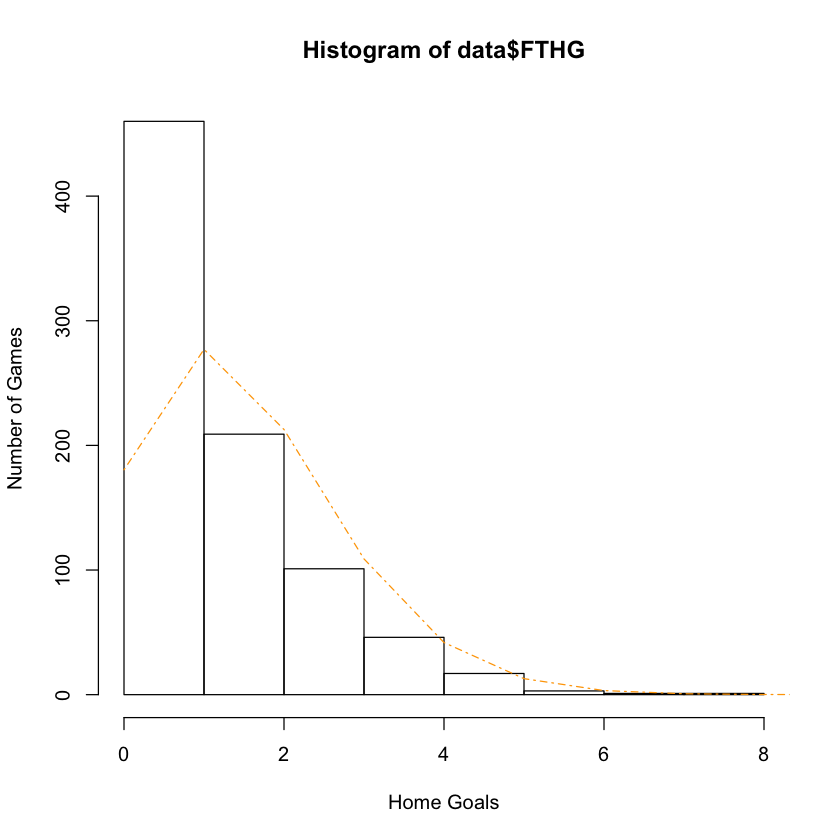

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Home goals – Away Goals' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Home goals – Away Goals' in 'mbcsToSbcs': dot substituted for <80>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on 'Home goals – Away Goals' in 'mbcsToSbcs': dot substituted for <93>”

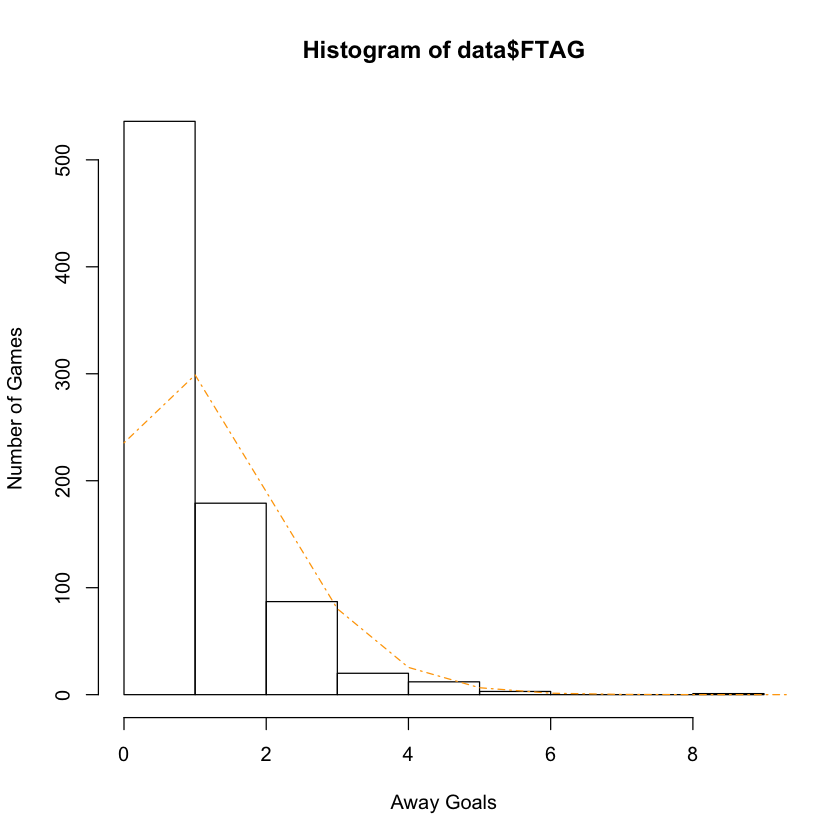

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


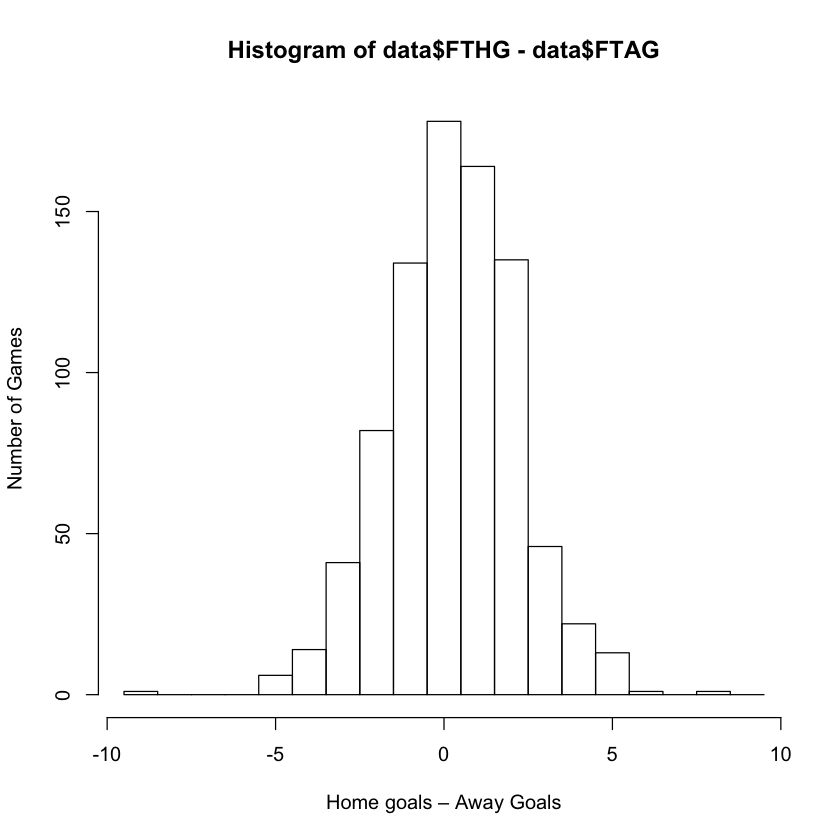

In [261]:
## TASK 1
# 1-2)

hist(data$FTHG, xlab= 'Home Goals', ylab='Number of Games')
poiH=dpois(0:10,mean(data$FTHG))
lines(0:10, poiH*length(data$FTHG), type = "l", lty = 4,col = "orange")

hist(data$FTAG, xlab= 'Away Goals', ylab='Number of Games')
poiA=dpois(0:10,mean(data$FTAG))
lines(0:10, poiA*length(data$FTAG), type = "l", lty = 4,col = "orange")

hist(data$FTHG-data$FTAG, xlab= 'Home goals – Away Goals', ylab='Number of Games', breaks=seq(-9.5,9.5,by=1))
poiD=dpois(-10:10,mean(data$FTHG-data$FTAG))
lines(0:10, poiD*length(data$FTHG-data$FTAG), type = "l", lty = 4,col = "orange")

#for both cases, poisson distributions fit



In [210]:
#TASK 1
# 2)

#the distribution looks like Geometric distribution.
#to check the distribution, lets check if the mean and std are close the each other.

library(skimr)
skim(data)

#It is observed that for both FTHG and FTAG, mean and standard deviations are close to each other
#Therefore, Poisson distribution can be applicable.

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             838   
Number of columns          40    
_______________________          
Column type frequency:           
  factor                   6     
  numeric                  34    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Date                  0             1 FALSE        248
2 HomeTeam              0             1 FALSE         25
3 AwayTeam              0             1 FALSE         25
4 FTR                   0             1 FALSE          3
5 HTR                   0             1 FALSE          3
6 Referee               0             1 FALSE         25
  top_counts                        
1 12/: 10, 26/: 10, 26/: 9, 01/: 9  
2 Ars: 42, Bri: 42, Che: 42, Cry: 42
3 Ars: 42, Bri: 42, Bur: 42

ERROR: Error in xy.coords(x, y): 'exp_game' nesnesi bulunamadı


In [196]:
library(plyr)
library(dplyr)
 #<- data %>% 
 # mutate( B365H=1/B365H)
  #  mutate( B365A=1/B365A)
  #  mutate( B365D=1/B365D)

In [201]:
#TASK 2

#Question1

bet <- data %>%
  
  select(B365H,B365D, B365A )
   bet$H=1/bet$B365H
  bet$A=1/bet$B365A
  bet$D=1/bet$B365D

BAW<- data %>%
  
  select(VCH,VCD, VCA )
   BAW$H=1/BAW$VCH
  BAW$A=1/BAW$VCA
  BAW$D=1/BAW$VCD

IW <- data %>%
  
  select(IWH,IWD, IWA )
   IW$H=1/IW$IWH
  IW$A=1/IW$IWA
  IW$D=1/IW$IWD

pine <- data %>%
  
  select(PSH,PSD, PSA )
   pine$H=1/pine$PSH
  pine$A=1/pine$PSA
  pine$D=1/pine$PSD

In [202]:
#Task2 - Question2

length = nrow(bet)
#normalized version of probabilities
for(i in 1:length){
    bet$initial[i] = bet$H[i]+bet$D[i]+bet$A[i]
    bet$H[i] = (bet$H[i]/(bet$H[i]+bet$D[i]+bet$A[i])) 
    bet$D[i] = (bet$D[i]/(bet$H[i]+bet$D[i]+bet$A[i]))
    bet$A[i] = (bet$A[i]/(bet$H[i]+bet$D[i]+bet$A[i]))
    bet$check[i] = bet$H[i]+bet$D[i]+bet$A[i]
}
   bet$result = data$FTR
head(bet)

length_BAW = nrow(BAW)
#normalized version of probabilities
for(i in 1:length_BAW){
   BAW$initial[i] = BAW$H[i]+BAW$D[i]+BAW$A[i]
    BAW$H[i] = (BAW$H[i]/(BAW$H[i]+BAW$D[i]+BAW$A[i])) 
    BAW$D[i] = (BAW$D[i]/(BAW$H[i]+BAW$D[i]+BAW$A[i]))
    BAW$A[i] = (BAW$A[i]/(BAW$H[i]+BAW$D[i]+BAW$A[i]))
    BAW$check[i] = BAW$H[i]+BAW$D[i]+BAW$A[i]
}
  BAW$result = data$FTR
head(BAW)

length_IW = nrow(IW)
#normalized version of probabilities
for(i in 1:length_IW){
    IW$initial[i] = IW$H[i]+ IW$D[i]+ IW$A[i]
    IW$H[i] = (IW$H[i]/(IW$H[i]+ IW$D[i]+ IW$A[i])) 
    IW$D[i] = (IW$D[i]/(IW$H[i]+ IW$D[i]+ IW$A[i]))
    IW$A[i] = (IW$A[i]/(IW$H[i]+ IW$D[i]+ IW$A[i]))
    IW$check[i] = IW$H[i]+IW$D[i]+ IW$A[i]
}
   IW$result = data$FTR
head(IW)

length_pine = nrow(pine)
#normalized version of probabilities
for(i in 1:length_pine){
    pine$initial[i] = pine$H[i]+ pine$D[i]+ pine$A[i]
    pine$H[i] = (pine$H[i]/(pine$H[i]+ pine$D[i]+ pine$A[i])) 
    pine$D[i] = (pine$D[i]/(pine$H[i]+ pine$D[i]+ pine$A[i]))
    pine$A[i] = (pine$A[i]/(pine$H[i]+ pine$D[i]+ pine$A[i]))
    pine$check[i] = pine$H[i]+pine$D[i]+ pine$A[i]
}
   pine$result = data$FTR
head(pine)

,B365H,B365D,B365A,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.57,3.9,7.50,0.6203869,0.1323330,0.2538388,1.026686,1.006559,H
2,1.90,3.6,4.50,0.5128205,0.2201737,0.2742616,1.026316,1.007256,H
3,2.50,3.4,3.00,0.3893130,0.3294085,0.2892684,1.027451,1.007990,A
4,6.50,4.0,1.61,0.1500991,0.6113228,0.2448059,1.024964,1.006228,A
5,3.90,3.5,2.04,0.2483824,0.4817573,0.2789381,1.032321,1.009078,A
6,2.37,3.2,3.40,0.4102255,0.2907258,0.3073237,1.028559,1.008275,H


,VCH,VCD,VCA,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.57,4.0,7.00,0.6185112,0.1416449,0.2471899,1.029800,1.007346,H
2,1.87,3.6,4.75,0.5227040,0.2088589,0.2747533,1.023063,1.006316,H
3,2.50,3.4,3.00,0.3893130,0.3294085,0.2892684,1.027451,1.007990,A
4,6.50,4.0,1.62,0.1506626,0.6090382,0.2455925,1.021130,1.005293,A
5,3.90,3.4,2.10,0.2497377,0.4694928,0.2883377,1.026718,1.007568,A
6,2.40,3.2,3.40,0.4071856,0.2913358,0.3082452,1.023284,1.006767,H


,IWH,IWD,IWA,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.55,3.80,7.00,0.6137517,0.1407923,0.2580569,1.051176,1.012601,H
2,1.90,3.50,4.10,0.4984370,0.2390598,0.2779177,1.055933,1.015414,H
3,2.40,3.30,2.95,0.3935719,0.3306596,0.2926174,1.058680,1.016849,A
4,6.20,4.00,1.55,0.1526718,0.6224898,0.2385876,1.056452,1.013749,A
5,3.70,3.35,2.05,0.2557966,0.4735753,0.2864455,1.056583,1.015818,A
6,2.20,3.30,3.40,0.4322034,0.2881499,0.2943896,1.051693,1.014743,H


,PSH,PSD,PSA,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.58,3.93,7.50,0.6200772,0.1325541,0.2524676,1.020698,1.005099,H
2,1.89,3.63,4.58,0.5172436,0.2165968,0.2724669,1.022923,1.006307,H
3,2.50,3.46,3.00,0.3912552,0.3301225,0.2851378,1.022351,1.006515,A
4,6.41,4.02,1.62,0.1526411,0.6086896,0.2441944,1.022046,1.005525,A
5,3.83,3.57,2.08,0.2554817,0.4751373,0.2756024,1.021978,1.006221,A
6,2.43,3.22,3.33,0.4025136,0.2975407,0.3064607,1.022382,1.006515,H


In [168]:
#install.packages("ggplot2")
library(ggplot2)
#install.packages("ggpubr")
library(ggpubr)
#install.packages("entropy")
library(entropy)

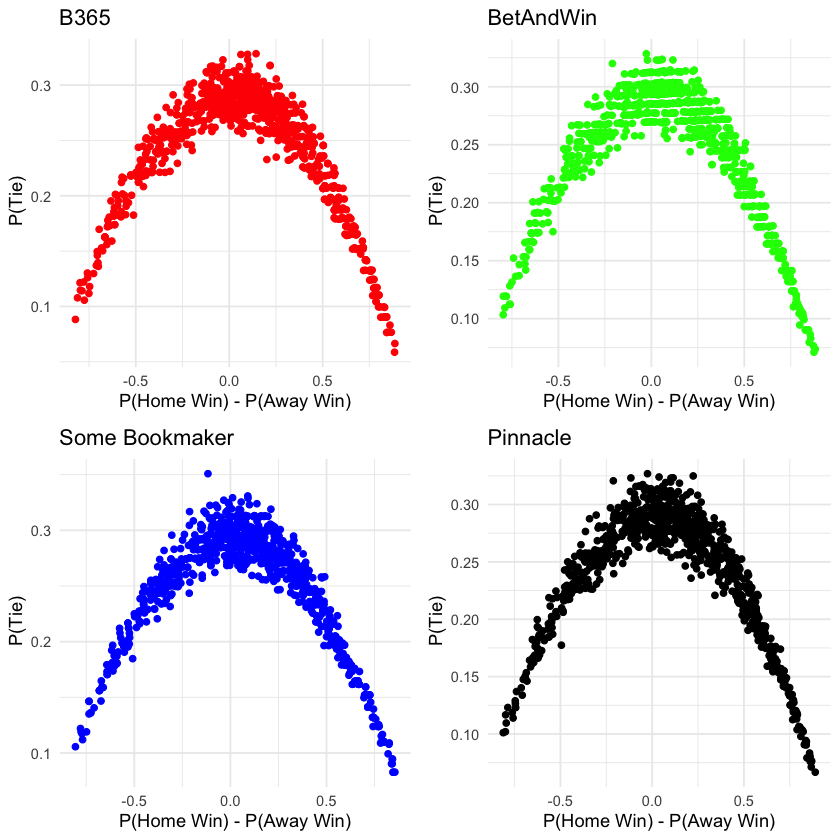

In [213]:

probs_bet365 <-
ggplot(bet) + geom_point(aes(x = H - A, y = D), col = "red") + ggtitle("B365") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()

probs_BAW <-
ggplot(BAW) + geom_point(aes(x = H - A, y = D), col = "green") + ggtitle("VC") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()

probs_IW <-
ggplot(IW) + geom_point(aes(x = H - A, y = D), col = "blue") + ggtitle("Some Bookmaker") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()


probs_pine <-
ggplot(pine) + geom_point(aes(x = H - A, y = D), col = "black") + ggtitle("Pinnacle") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()


ggarrange(probs_bet365,probs_betAwin,probs_IW,probs_pine)


In [204]:
bet$bins <- cut(bet$H-bet$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)

BAW$bins <- cut(BAW$H-BAW$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)

IW$bins <- cut(IW$H-IW$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)

pine$bins <- cut(pine$H-pine$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)



In [205]:
bet$bins<-as.numeric(bet$bins)
BAW$bins<-as.numeric(BAW$bins)
IW$bins<-as.numeric(IW$bins)
pine$bins<-as.numeric(pine$bins)

In [206]:
bet_draw <-bet %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_bet <- bet_draw[2]
 reallife_bet <- unlist( reallife_bet)
 reallife_bet <- as.numeric( reallife_bet)
 reallife_bet <-  reallife_bet / sum(reallife_bet)
#-------
bet_baw <-BAW %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_baw <- bet_baw[2]
 reallife_baw <- unlist( reallife_baw)
 reallife_baw <- as.numeric( reallife_baw)
 reallife_baw <-  reallife_baw / sum(reallife_baw)
bet_iw
reallife_baw
#-------
bet_iw <-IW %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_iw <- bet_iw[2]
 reallife_iw <- unlist( reallife_iw)
 reallife_iw <- as.numeric( reallife_iw)
 reallife_iw <-  reallife_iw / sum(reallife_iw)
#-------
bet_pine <-pine %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_pine <- bet_pine[2]
 reallife_pine <- unlist( reallife_pine)
 reallife_pine <- as.numeric( reallife_pine)
 reallife_pine <-  reallife_pine / sum(reallife_pine)

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


bins,no
<dbl>,<int>
1,0
2,3
3,8
4,17
5,25
6,59
7,37
8,21
9,7


[1] 0.000000000 0.028089888 0.039325843 0.089887640 0.129213483 0.314606742
 [7] 0.202247191 0.134831461 0.056179775 0.005617978

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


In [226]:
pop <- c(-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9)

probs_bet365 <-
ggplot() + geom_point(aes(x = bet$H - bet$A, y = bet$D), col = "red") + ggtitle("B365") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_bet), col = "black",shape= 3, size=4) + theme_minimal()


probs_BAW <-
ggplot() + geom_point(aes(x = BAW$H - BAW$A, y = BAW$D), col = "BLACK") + ggtitle("VC") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_baw), col = "RED",shape= 3, size=4) + theme_minimal()


probs_IW <-
ggplot() + geom_point(aes(x = IW$H - IW$A, y = IW$D), col = "orange") + ggtitle("IW") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_iw), col = "black",shape= 3, size=4) + theme_minimal()


probs_Pinnacle <-
ggplot() + geom_point(aes(x = pine$H - pine$A, y = pine$D), col = "green") + ggtitle("Pinnacle") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_pine), col = "black",shape= 3, size=4) + theme_minimal()



#geom_point(aes(x = discrete, y = B365D_actual), shape=17, size=3)


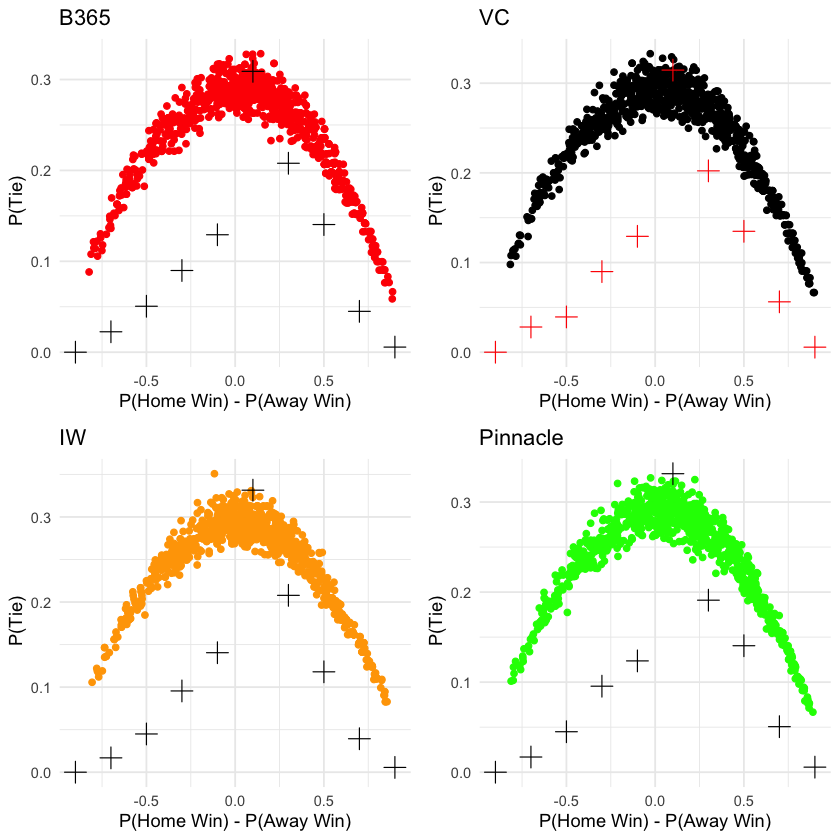

In [262]:
ggarrange(probs_bet365,probs_BAW,probs_IW,probs_Pinnacle)

#Since there is no actual point over the probability that bookmakers provided.
#Therefore, we cannot say it is biased in advantageous of us.



In [216]:
# TASK 3

fair <- data %>% filter(HR==0&AR==0)
#head(fair)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,⋯,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,⋯,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00
2,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,⋯,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75
3,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,⋯,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00
4,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,⋯,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62
5,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,⋯,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10
6,11/08/2018,Watford,Brighton,2,0,H,1,0,H,J Moss,⋯,3.40,2.43,3.22,3.33,2.38,3.0,3.30,2.40,3.2,3.40


In [217]:
#TASK 2

#Question1

fbet <- fair %>%
  
  select(B365H,B365D, B365A )
   fbet$H=1/fbet$B365H
  fbet$A=1/fbet$B365A
  fbet$D=1/fbet$B365D

fBAW<- fair %>%
  
  select(VCH,VCD, VCA )
   fBAW$H=1/fBAW$VCH
  fBAW$A=1/fBAW$VCA
  fBAW$D=1/fBAW$VCD

fIW <- fair %>%
  
  select(IWH,IWD, IWA )
   fIW$H=1/fIW$IWH
  fIW$A=1/fIW$IWA
  fIW$D=1/fIW$IWD

fpine <- fair %>%
  
  select(PSH,PSD, PSA )
   fpine$H=1/fpine$PSH
  fpine$A=1/fpine$PSA
  fpine$D=1/fpine$PSD

In [218]:
length = nrow(fbet)
#normalized version of probabilities
for(i in 1:length){
    fbet$initial[i] = fbet$H[i]+fbet$D[i]+fbet$A[i]
    fbet$H[i] = (fbet$H[i]/(fbet$H[i]+fbet$D[i]+fbet$A[i])) 
    fbet$D[i] = (fbet$D[i]/(fbet$H[i]+fbet$D[i]+fbet$A[i]))
    fbet$A[i] = (fbet$A[i]/(fbet$H[i]+fbet$D[i]+fbet$A[i]))
    fbet$check[i] = fbet$H[i]+fbet$D[i]+fbet$A[i]
}
   fbet$result = fair$FTR
head(fbet)

length_BAW = nrow(fBAW)
#normalized version of probabilities
for(i in 1:length_BAW){
   fBAW$initial[i] = fBAW$H[i]+fBAW$D[i]+fBAW$A[i]
    fBAW$H[i] = (fBAW$H[i]/(fBAW$H[i]+fBAW$D[i]+fBAW$A[i])) 
    fBAW$D[i] = (fBAW$D[i]/(fBAW$H[i]+fBAW$D[i]+fBAW$A[i]))
    fBAW$A[i] = (fBAW$A[i]/(fBAW$H[i]+fBAW$D[i]+fBAW$A[i]))
    fBAW$check[i] = fBAW$H[i]+fBAW$D[i]+fBAW$A[i]
}
  fBAW$result = fair$FTR
head(fBAW)

length_IW = nrow(fIW)
#normalized version of probabilities
for(i in 1:length_IW){
    fIW$initial[i] = fIW$H[i]+ fIW$D[i]+ fIW$A[i]
    fIW$H[i] = (fIW$H[i]/(fIW$H[i]+ fIW$D[i]+ fIW$A[i])) 
    fIW$D[i] = (fIW$D[i]/(fIW$H[i]+ fIW$D[i]+ fIW$A[i]))
    fIW$A[i] = (fIW$A[i]/(fIW$H[i]+ fIW$D[i]+ fIW$A[i]))
    fIW$check[i] = fIW$H[i]+fIW$D[i]+ fIW$A[i]
}
   fIW$result = fair$FTR
head(fIW)

length_pine = nrow(fpine)
#normalized version of probabilities
for(i in 1:length_pine){
    fpine$initial[i] = fpine$H[i]+ fpine$D[i]+ fpine$A[i]
    fpine$H[i] = (fpine$H[i]/(fpine$H[i]+ fpine$D[i]+ fpine$A[i])) 
    fpine$D[i] = (fpine$D[i]/(fpine$H[i]+ fpine$D[i]+ fpine$A[i]))
    fpine$A[i] = (fpine$A[i]/(fpine$H[i]+ fpine$D[i]+ fpine$A[i]))
    fpine$check[i] = fpine$H[i]+fpine$D[i]+ fpine$A[i]
}
   fpine$result = fair$FTR
head(fpine)

,B365H,B365D,B365A,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.57,3.9,7.50,0.6203869,0.1323330,0.2538388,1.026686,1.006559,H
2,1.90,3.6,4.50,0.5128205,0.2201737,0.2742616,1.026316,1.007256,H
3,2.50,3.4,3.00,0.3893130,0.3294085,0.2892684,1.027451,1.007990,A
4,6.50,4.0,1.61,0.1500991,0.6113228,0.2448059,1.024964,1.006228,A
5,3.90,3.5,2.04,0.2483824,0.4817573,0.2789381,1.032321,1.009078,A
6,2.37,3.2,3.40,0.4102255,0.2907258,0.3073237,1.028559,1.008275,H


,VCH,VCD,VCA,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.57,4.0,7.00,0.6185112,0.1416449,0.2471899,1.029800,1.007346,H
2,1.87,3.6,4.75,0.5227040,0.2088589,0.2747533,1.023063,1.006316,H
3,2.50,3.4,3.00,0.3893130,0.3294085,0.2892684,1.027451,1.007990,A
4,6.50,4.0,1.62,0.1506626,0.6090382,0.2455925,1.021130,1.005293,A
5,3.90,3.4,2.10,0.2497377,0.4694928,0.2883377,1.026718,1.007568,A
6,2.40,3.2,3.40,0.4071856,0.2913358,0.3082452,1.023284,1.006767,H


,IWH,IWD,IWA,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.55,3.80,7.00,0.6137517,0.1407923,0.2580569,1.051176,1.012601,H
2,1.90,3.50,4.10,0.4984370,0.2390598,0.2779177,1.055933,1.015414,H
3,2.40,3.30,2.95,0.3935719,0.3306596,0.2926174,1.058680,1.016849,A
4,6.20,4.00,1.55,0.1526718,0.6224898,0.2385876,1.056452,1.013749,A
5,3.70,3.35,2.05,0.2557966,0.4735753,0.2864455,1.056583,1.015818,A
6,2.20,3.30,3.40,0.4322034,0.2881499,0.2943896,1.051693,1.014743,H


,PSH,PSD,PSA,H,A,D,initial,check,result
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1.58,3.93,7.50,0.6200772,0.1325541,0.2524676,1.020698,1.005099,H
2,1.89,3.63,4.58,0.5172436,0.2165968,0.2724669,1.022923,1.006307,H
3,2.50,3.46,3.00,0.3912552,0.3301225,0.2851378,1.022351,1.006515,A
4,6.41,4.02,1.62,0.1526411,0.6086896,0.2441944,1.022046,1.005525,A
5,3.83,3.57,2.08,0.2554817,0.4751373,0.2756024,1.021978,1.006221,A
6,2.43,3.22,3.33,0.4025136,0.2975407,0.3064607,1.022382,1.006515,H


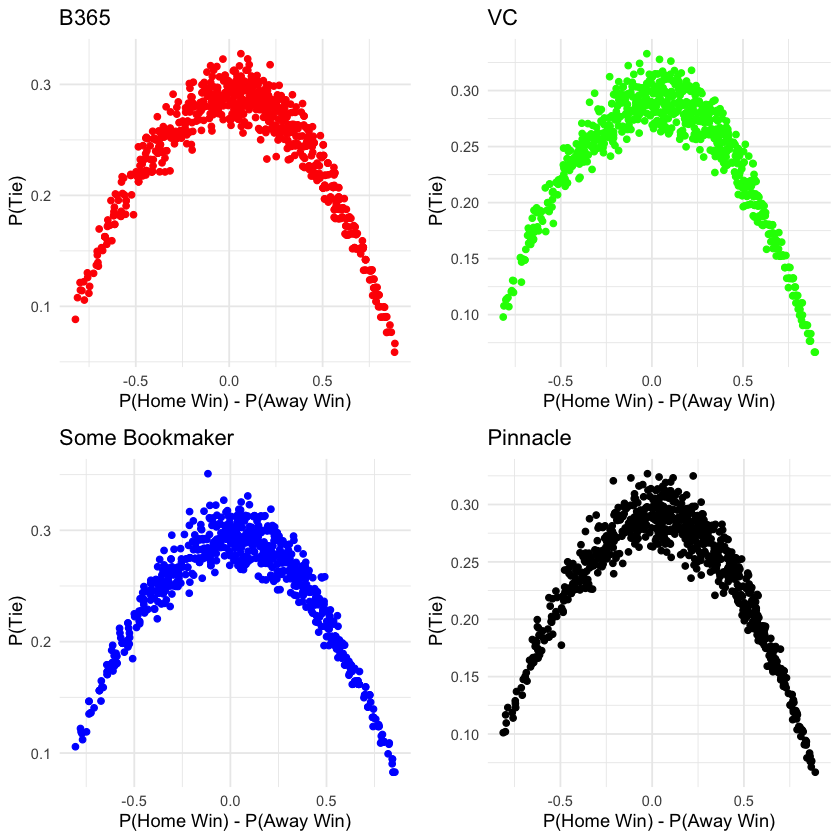

In [219]:

probs_fbet365 <-
ggplot(fbet) + geom_point(aes(x = H - A, y = D), col = "red") + ggtitle("B365") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()

probs_fBAW <-
ggplot(fBAW) + geom_point(aes(x = H - A, y = D), col = "green") + ggtitle("VC") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()

probs_fIW <-
ggplot(fIW) + geom_point(aes(x = H - A, y = D), col = "blue") + ggtitle("Some Bookmaker") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()


probs_fpine <-
ggplot(fpine) + geom_point(aes(x = H - A, y = D), col = "black") + ggtitle("Pinnacle") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") + theme_minimal()


ggarrange(probs_fbet365,probs_fBAW,probs_fIW,probs_fpine)



In [220]:
fbet$bins <- cut(fbet$H-fbet$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)

fBAW$bins <- cut(fBAW$H-fBAW$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)

fIW$bins <- cut(fIW$H-fIW$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)

fpine$bins <- cut(fpine$H-fpine$A,
                                breaks = c(-1,-0.8, -0.6, -0.4, -0.2, 0 , 0.2, 0.4, 0.6, 0.8, 1),                    
)




In [221]:
fbet$bins<-as.numeric(fbet$bins)
fBAW$bins<-as.numeric(fBAW$bins)
fIW$bins<-as.numeric(fIW$bins)
fpine$bins<-as.numeric(fpine$bins)

In [222]:
fbet_draw <-fbet %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_fbet <- fbet_draw[2]
 reallife_fbet <- unlist( reallife_fbet)
 reallife_fbet <- as.numeric( reallife_fbet)
 reallife_fbet <-  reallife_fbet / sum(reallife_fbet)
#-------
bet_fbaw <-fBAW %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_fbaw <- bet_fbaw[2]
 reallife_fbaw <- unlist( reallife_fbaw)
 reallife_fbaw <- as.numeric( reallife_fbaw)
 reallife_fbaw <-  reallife_fbaw / sum(reallife_fbaw)
#-------
bet_fiw <-fIW %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_fiw <- bet_fiw[2]
 reallife_fiw <- unlist( reallife_fiw)
 reallife_fiw <- as.numeric( reallife_fiw)
 reallife_fiw <-  reallife_fiw / sum(reallife_fiw)
#-------
bet_fpine <-fpine %>%
  group_by(bins, .drop=FALSE) %>% 
  filter(result=="D")%>%
  summarise(no = n())

 reallife_fpine <- bet_fpine[2]
 reallife_fpine <- unlist( reallife_fpine)
 reallife_fpine <- as.numeric( reallife_fpine)
 reallife_fpine <-  reallife_fpine / sum(reallife_fpine)

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


In [223]:
pop <- c(-0.9,-0.7,-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7,0.9)

probs_fbet365 <-
ggplot() + geom_point(aes(x = fbet$H - fbet$A, y = fbet$D), col = "red") + ggtitle("B365") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_bet), col = "black",shape= 3, size=4) + theme_minimal()


probs_fBAW <-
ggplot() + geom_point(aes(x = fBAW$H - fBAW$A, y = fBAW$D), col = "BLACK") + ggtitle("VC") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_baw), col = "RED",shape= 3, size=4) + theme_minimal()


probs_fIW <-
ggplot() + geom_point(aes(x = fIW$H - fIW$A, y = fIW$D), col = "orange") + ggtitle("IW") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_iw), col = "black",shape= 3, size=4) + theme_minimal()


probs_fPinnacle <-
ggplot() + geom_point(aes(x = fpine$H - fpine$A, y = fpine$D), col = "green") + ggtitle("Pinnacle") + xlab("P(Home Win) - P(Away Win)")+ ylab(" P(Tie)") +geom_point( aes(x = pop, y = reallife_pine), col = "black",shape= 3, size=4) + theme_minimal()




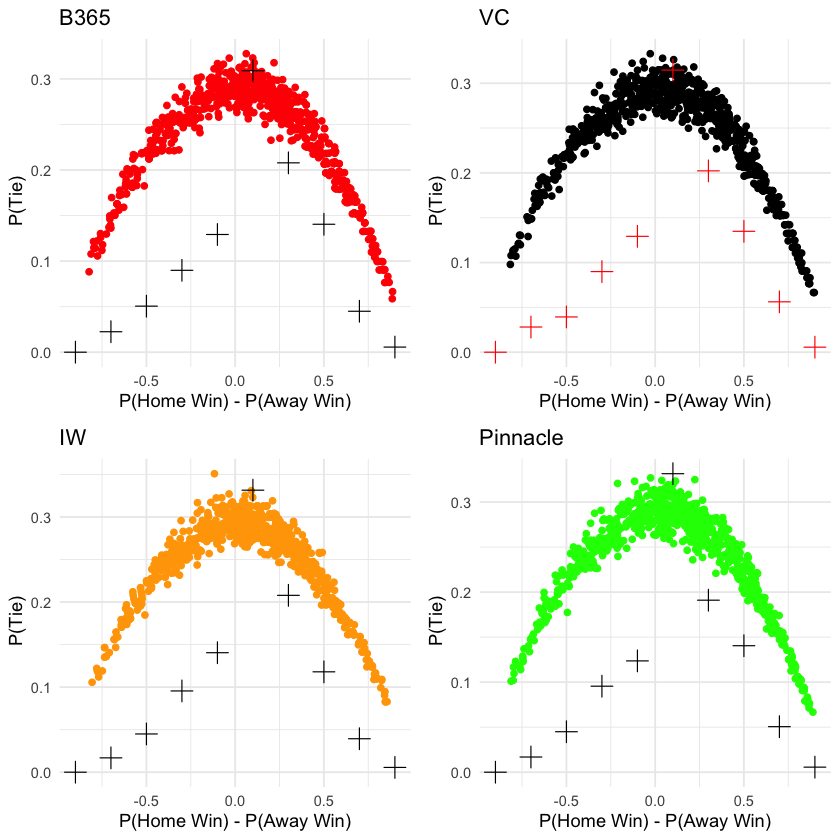

In [229]:
ggarrange(probs_fbet365,probs_fBAW,probs_fIW,probs_fPinnacle)



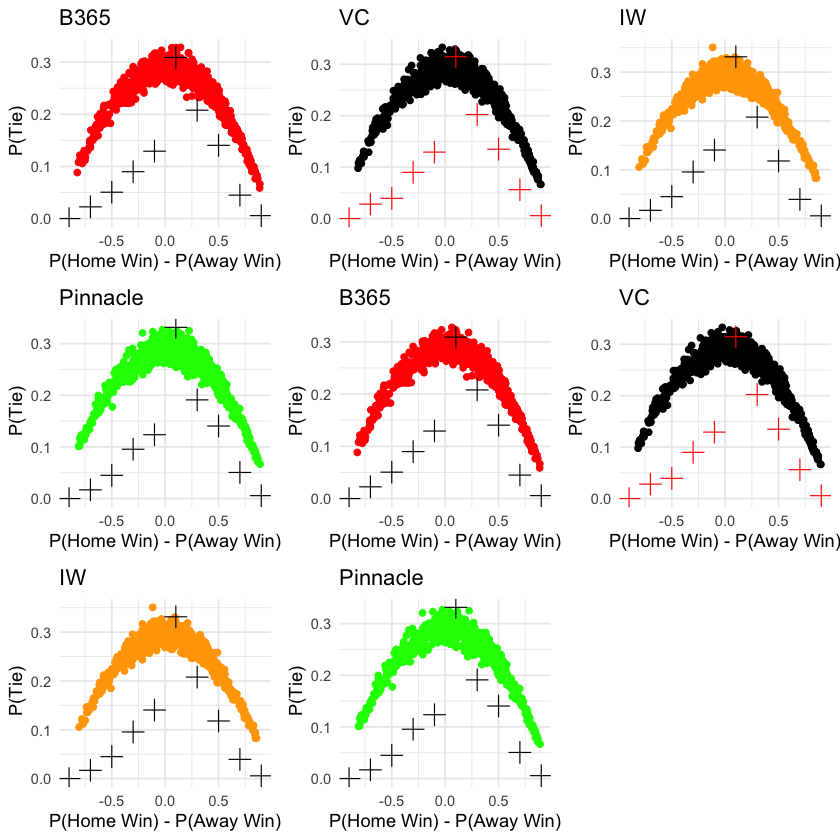

In [230]:
ggarrange(probs_bet365,probs_BAW,probs_IW,probs_Pinnacle,probs_fbet365,probs_fBAW,probs_fIW,probs_fPinnacle)

#It is observed that there is no significant difference with or without red card.
